In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [3]:
weather = pd.read_csv("C:/Users/aashi/OneDrive/Desktop/Hackathon/weather_data.csv")
health = pd.read_csv("C:/Users/aashi/OneDrive/Desktop/Hackathon/health_data.csv")
traffic = pd.read_csv("C:/Users/aashi/OneDrive/Desktop/Hackathon/traffic_data.csv")

weather.head(), health.head(), traffic.head()

(         date       city  temperature  humidity  rainfall  aqi  heat_index  \
 0  2025-10-09  Ahmedabad         35.1        32   0.00000   74        36.7   
 1  2025-10-10  Ahmedabad         26.7        34   0.00000  202        28.4   
 2  2025-10-11  Ahmedabad         32.2        64   0.00000  104        35.4   
 3  2025-10-12  Ahmedabad         32.6        54   0.00000  161        35.3   
 4  2025-10-13  Ahmedabad         31.8        39   9.38515  104        33.8   
 
   air_quality_category  
 0             Moderate  
 1                 Poor  
 2                 Poor  
 3                 Poor  
 4                 Poor  ,
          date       city  total_hospital_visits  respiratory_cases  \
 0  2025-10-09  Ahmedabad                     86                 33   
 1  2025-10-10  Ahmedabad                    125                101   
 2  2025-10-11  Ahmedabad                    103                 45   
 3  2025-10-12  Ahmedabad                    144                 92   
 4  2025-10-

In [4]:
df = weather.merge(traffic, on=["date", "city"], how="inner")
df = df.merge(health, on=["date", "city"], how="inner")

df.head()

,date,city,temperature,humidity,rainfall,aqi,heat_index,air_quality_category,vehicle_count,avg_speed,congestion_level,total_hospital_visits,respiratory_cases,heat_related_cases
0,2025-10-09,Ahmedabad,35.1,32,0.00000,74,36.7,Moderate,115,46,Low,86,33,24
1,2025-10-10,Ahmedabad,26.7,34,0.00000,202,28.4,Poor,441,10,High,125,101,0
2,2025-10-11,Ahmedabad,32.2,64,0.00000,104,35.4,Poor,156,41,Medium,103,45,6
3,2025-10-12,Ahmedabad,32.6,54,0.00000,161,35.3,Poor,394,11,High,144,92,10
4,2025-10-13,Ahmedabad,31.8,39,9.38515,104,33.8,Poor,144,42,Low,104,49,8


In [5]:
# Create health risk level
df["health_risk"] = pd.cut(
    df["total_hospital_visits"],
    bins=[0, 80, 120, 200],
    labels=["Low", "Medium", "High"]
)

In [7]:
le_aqi = LabelEncoder()
le_cong = LabelEncoder()
le_risk = LabelEncoder()

df["air_quality_category"] = le_aqi.fit_transform(df["air_quality_category"])
df["congestion_level"] = le_cong.fit_transform(df["congestion_level"])
df["health_risk"] = le_risk.fit_transform(df["health_risk"])

In [8]:
# Combined environmental stress
df["environmental_stress"] = df["aqi"] * df["heat_index"]

# Traffic-health interaction
df["traffic_stress"] = df["vehicle_count"] / (df["avg_speed"] + 1)

# Weather discomfort score
df["weather_discomfort"] = df["temperature"] * df["humidity"]

In [9]:
X = df.drop([
    "date",
    "city",
    "health_risk"
], axis=1)

y = df["health_risk"]


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=300, random_state=42)

In [16]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

In [11]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.00      0.00      0.00         4
           2       0.69      1.00      0.82         9

    accuracy                           0.80        20
   macro avg       0.56      0.67      0.61        20
weighted avg       0.66      0.80      0.72        20



C:\Users\aashi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aashi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aashi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

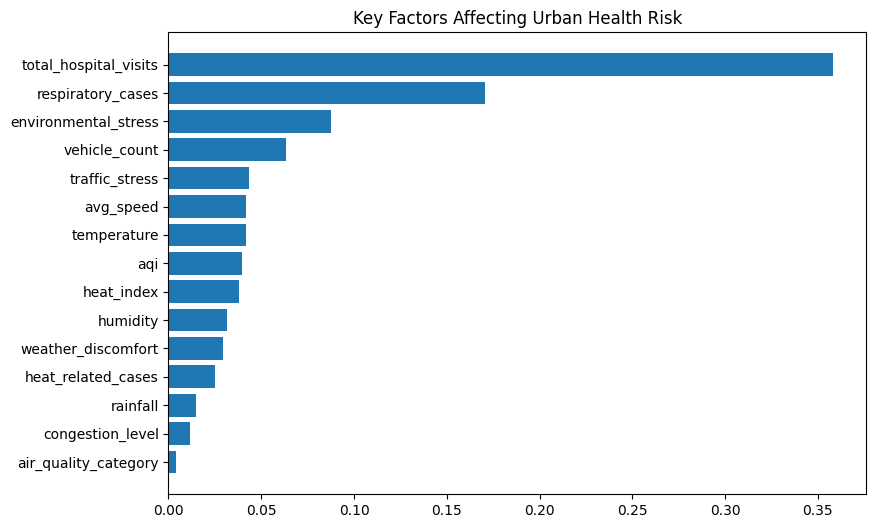

In [12]:
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
features = X.columns

indices = np.argsort(importances)

plt.figure(figsize=(9,6))
plt.barh(features[indices], importances[indices])
plt.title("Key Factors Affecting Urban Health Risk")
plt.show()


In [14]:
import streamlit as st

In [15]:
st.subheader("🔮 Predict Health Risk")

temp = st.slider("Temperature", 10, 45, 30)
aqi = st.slider("AQI", 50, 300, 150)
traffic = st.slider("Vehicle Count", 50, 500, 200)
speed = st.slider("Average Speed", 5, 60, 30)

input_data = [[
    temp,
    60,     # humidity
    0,      # rainfall
    aqi,
    temp*1.1,  # heat index approx
    2,      # air quality category
    100,    # hospital visits placeholder
    50,     # respiratory cases
    5,      # heat related
    traffic,
    speed,
    1,      # congestion
    aqi*temp,
    traffic/(speed+1),
    temp*60
]]

pred = model.predict(input_data)
st.success(f"Predicted Health Risk: {le_risk.inverse_transform(pred)[0]}")

2026-01-17 20:50:37.911 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 20:50:38.562 
  command:

    streamlit run C:\Users\aashi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
2026-01-17 20:50:38.564 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 20:50:38.566 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 20:50:38.567 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 20:50:38.569 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 20:50:38.571 Thread 'MainThread': missing ScriptRunContext! This w

DeltaGenerator()